In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Sheart\Sheart_AG_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,1.0,70.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0
1,0.0,67.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0
2,1.0,NaN,2.0,124.0,261.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN
3,1.0,64.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0
4,0.0,74.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1.0,52.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0
266,1.0,44.0,2.0,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0
267,0.0,56.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0
268,NaN,57.0,NaN,NaN,192.0,0.0,0.0,148.0,NaN,0.4,NaN,NaN,6.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	14
float64		column 2	22
float64		column 3	43
float64		column 4	21
float64		column 5	7
float64		column 6	7
float64		column 7	7
float64		column 8	35
float64		column 9	36
float64		column 10	35
float64		column 11	43
float64		column 12	29
float64		column 13	43


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
count,256.000000,248.000000,227.000000,249.000000,263.000000,263.000000,263.000000,235.000000,234.000000,235.000000,227.000000,241.000000,227.000000
mean,0.675781,54.604839,3.158590,130.915663,249.224335,0.144487,1.026616,149.851064,0.346154,1.038723,1.581498,0.643154,4.704846
std,0.468999,9.187052,0.960021,17.671422,52.083673,0.352253,0.997733,23.718054,0.476763,1.165380,0.628393,0.920397,1.952109
min,0.000000,29.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,0.000000,47.000000,3.000000,120.000000,212.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,1.000000,56.000000,3.000000,130.000000,244.000000,0.000000,2.000000,154.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,1.000000,61.250000,4.000000,140.000000,277.000000,0.000000,2.000000,168.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,1.000000,77.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


<AxesSubplot:>

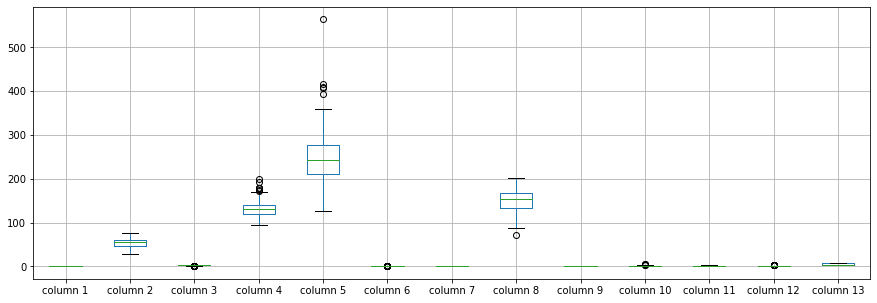

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1       0.675781
column 2      54.604839
column 3       3.158590
column 4     130.915663
column 5     249.224335
column 6       0.144487
column 7       1.026616
column 8     149.851064
column 9       0.346154
column 10      1.038723
column 11      1.581498
column 12      0.643154
column 13      4.704846
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
column 1,1.000000,-0.138860,0.018521,-0.095189,-0.192094,0.052489,0.048655,-0.059504,0.179989,0.136947,0.047738,0.030479,0.372511
column 2,-0.138860,1.000000,0.093883,0.246832,0.218766,0.131588,0.128621,-0.442891,0.065977,0.205857,0.172229,0.349480,0.090885
column 3,0.018521,0.093883,1.000000,-0.015670,0.063477,-0.094377,0.056402,-0.299000,0.336360,0.106489,0.102069,0.223432,0.256010
column 4,-0.095189,0.246832,-0.015670,1.000000,0.153497,0.150829,0.095835,-0.018325,0.041332,0.195398,0.132615,0.074675,0.121957
column 5,-0.192094,0.218766,0.063477,0.153497,1.000000,0.001377,0.177678,-0.000309,0.015628,-0.031050,-0.053292,0.110443,0.010554
column 6,0.052489,0.131588,-0.094377,0.150829,0.001377,1.000000,0.054176,0.008210,-0.035070,-0.040578,0.044222,0.127866,0.035034
column 7,0.048655,0.128621,0.056402,0.095835,0.177678,0.054176,1.000000,-0.079155,0.062305,0.067844,0.126161,0.133419,-0.006576
column 8,-0.059504,-0.442891,-0.299000,-0.018325,-0.000309,0.008210,-0.079155,1.000000,-0.376806,-0.339650,-0.395938,-0.274430,-0.264260
column 9,0.179989,0.065977,0.336360,0.041332,0.015628,-0.035070,0.062305,-0.376806,1.000000,0.256550,0.246220,0.101312,0.311527
column 10,0.136947,0.205857,0.106489,0.195398,-0.031050,-0.040578,0.067844,-0.339650,0.256550,1.000000,0.649903,0.262160,0.324300


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [13,13+7,13+7+7,13+7+7+7,13+7+7+7+7,13+7+7+7+7+7,13+7+7+7+7,13+7+7+7,13+7+7,13+7,13], vae_layer = False, seed = 7)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [13]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 568.0174312591553
Epoch: 1 , loss: 562.3981323242188
Epoch: 2 , loss: 566.955041885376
Epoch: 3 , loss: 564.8071556091309
Epoch: 4 , loss: 565.4074630737305
Epoch: 5 , loss: 565.342658996582
Epoch: 6 , loss: 565.0702438354492
Epoch: 7 , loss: 566.8169765472412
Epoch: 8 , loss: 563.6015758514404
Epoch: 9 , loss: 566.8864059448242
Epoch: 10 , loss: 565.9680862426758
Epoch: 11 , loss: 568.2311992645264
Epoch: 12 , loss: 566.1065654754639
Epoch: 13 , loss: 567.6484909057617
Epoch: 14 , loss: 563.7850208282471
Epoch: 15 , loss: 567.965950012207
Epoch: 16 , loss: 569.1606826782227
Epoch: 17 , loss: 566.8526954650879
Epoch: 18 , loss: 565.9559440612793
Epoch: 19 , loss: 565.0985336303711
Epoch: 20 , loss: 563.972339630127
Epoch: 21 , loss: 564.0398368835449
Epoch: 22 , loss: 564.0749473571777
Epoch: 23 , loss: 566.0860214233398
Epoch: 24 , loss: 563.4154968261719
Epoch: 25 , loss: 570.0423526763916
Epoch: 26 

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(270, 13)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1       1.0
column 2      48.0
column 3       2.0
column 4     130.0
column 5     245.0
column 6       0.0
column 7       2.0
column 8     180.0
column 9       0.0
column 10      0.2
column 11      2.0
column 12      0.0
column 13      3.0
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Sheart.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,-55.722711,0.000000,0.00000,0.0,0.0,0.0,-139.721744,0.059912,-0.155648,-0.754347,0.000000,-6.225430
3,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
266,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
267,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
268,-0.467726,0.000000,-1.575072,-134.05117,0.0,0.0,0.0,0.000000,0.238681,0.000000,-0.876120,0.513304,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(1255.8861986561171, 5414.752392307519)

In [17]:
NRMS=numerator/denominator
NRMS


0.2319378814884121

In [18]:
new_df.iloc[66,:]

column 1       1.0
column 2      51.0
column 3       4.0
column 4     140.0
column 5     261.0
column 6       0.0
column 7       2.0
column 8     186.0
column 9       1.0
column 10      0.0
column 11      1.0
column 12      0.0
column 13      3.0
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,1.000000,70.000000,4.000000,130.00000,322.0,0.0,2.0,109.000000,0.000000,2.400000,2.000000,3.000000,3.000000
1,0.000000,67.000000,3.000000,115.00000,564.0,0.0,2.0,160.000000,0.000000,1.600000,2.000000,0.000000,7.000000
2,1.000000,1.277289,2.000000,124.00000,261.0,0.0,0.0,1.278256,0.059912,0.144352,0.245653,0.000000,0.774570
3,1.000000,64.000000,4.000000,128.00000,263.0,0.0,0.0,105.000000,1.000000,0.200000,2.000000,1.000000,7.000000
4,0.000000,74.000000,2.000000,120.00000,269.0,0.0,2.0,121.000000,1.000000,0.200000,1.000000,1.000000,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1.000000,52.000000,3.000000,172.00000,199.0,1.0,0.0,162.000000,0.000000,0.500000,1.000000,0.000000,7.000000
266,1.000000,44.000000,2.000000,120.00000,263.0,0.0,0.0,173.000000,0.000000,0.000000,1.000000,0.000000,7.000000
267,0.000000,56.000000,2.000000,140.00000,294.0,0.0,2.0,153.000000,0.000000,1.300000,2.000000,0.000000,3.000000
268,0.532274,57.000000,2.424928,5.94883,192.0,0.0,0.0,148.000000,0.238681,0.400000,1.123880,0.513304,6.000000


In [20]:
imputations[-1].to_excel("Sheart_AG_10(imp).xlsx", index=False, header=False)